<a href="https://colab.research.google.com/github/ShovalBenjer/Manage-Warehouse-OPP-Python-10806Afeka/blob/main/Ai_Intro_Cs_188_assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Initialize an empty DataFrame with specified columns
data_df = pd.DataFrame(columns=['player_id', 'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played', 'market_value'])

# Assuming the CSV file has been uploaded to Google Colab, we'll read it into the DataFrame
# Replace 'appearances.csv' with the correct path if your file is in a specific directory
data_df = pd.read_csv('appearances.csv', usecols=['player_id', 'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played', 'market_value'])

# Group by 'player_id'
grouped = data_df.groupby('player_id')

# Calculate mean, std, and median for specified columns
for col in ['yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played']:
    data_df[f'{col}_mean'] = grouped[col].transform('mean')
    data_df[f'{col}_std'] = grouped[col].transform('std')
    data_df[f'{col}_median'] = grouped[col].transform('median')

# Displaying the first few rows of the modified DataFrame
data_df.head()



,player_id,yellow_cards,red_cards,goals,assists,minutes_played,market_value,yellow_cards_mean,yellow_cards_std,yellow_cards_median,...,red_cards_median,goals_mean,goals_std,goals_median,assists_mean,assists_std,assists_median,minutes_played_mean,minutes_played_std,minutes_played_median
0,38004,0,0,2,0,90,NaN,0.030303,0.172733,0.0,...,0.0,0.30303,0.525348,0.0,0.106061,0.310275,0.0,83.015152,19.776048,90.0
1,79232,0,0,0,0,90,NaN,0.100000,0.316228,0.0,...,0.0,0.10000,0.316228,0.0,0.100000,0.316228,0.0,61.200000,35.670716,82.0
2,42792,0,0,0,0,45,NaN,0.125000,0.353553,0.0,...,0.0,0.12500,0.353553,0.0,0.125000,0.353553,0.0,33.000000,30.218254,33.5
3,73333,0,0,0,0,90,NaN,0.076923,0.271746,0.0,...,0.0,0.00000,0.000000,0.0,0.038462,0.196116,0.0,58.230769,33.870704,71.5
4,122011,0,0,0,1,90,NaN,0.090909,0.288355,0.0,...,0.0,0.20000,0.457991,0.0,0.133333,0.358407,0.0,73.933333,29.933490,90.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**PREPROCESS**

In [ ]:
data_df.shape

(1048575, 22)

In [ ]:
data_df.drop_duplicates(subset='player_id', keep='first', inplace=True)
data_df.drop(columns=['market_value'], inplace=True)


(19105, 22)

In [ ]:
import pandas as pd

# Assuming you already have data_df as per previous steps

# Load the player_valuations.csv file
valuations_df = pd.read_csv('player_valuations.csv')

# Filter valuations_df to include only those player_id values present in data_df
valuations_df = valuations_df[valuations_df['player_id'].isin(list(data_df['player_id']))]
valuations_df = valuations_df.drop_duplicates(subset='player_id')

# Merge the filtered valuations_df into data_df on player_id
data_df = data_df.merge(valuations_df, on='player_id', how='left')
data_df.shape

(19105, 22)

In [ ]:
data_df.fillna(0, inplace=True)
data_df_copy = data_df.copy()
data_df

,player_id,yellow_cards,red_cards,goals,assists,minutes_played,yellow_cards_mean,yellow_cards_std,yellow_cards_median,red_cards_mean,...,goals_mean,goals_std,goals_median,assists_mean,assists_std,assists_median,minutes_played_mean,minutes_played_std,minutes_played_median,market_value_in_eur
0,38004,0,0,2,0,90,0.030303,0.172733,0.0,0.000000,...,0.30303,0.525348,0.0,0.106061,0.310275,0.0,83.015152,19.776048,90.0,75000.0
1,79232,0,0,0,0,90,0.100000,0.316228,0.0,0.000000,...,0.10000,0.316228,0.0,0.100000,0.316228,0.0,61.200000,35.670716,82.0,300000.0
2,42792,0,0,0,0,45,0.125000,0.353553,0.0,0.000000,...,0.12500,0.353553,0.0,0.125000,0.353553,0.0,33.000000,30.218254,33.5,150000.0
3,73333,0,0,0,0,90,0.076923,0.271746,0.0,0.000000,...,0.00000,0.000000,0.0,0.038462,0.196116,0.0,58.230769,33.870704,71.5,200000.0
4,122011,0,0,0,1,90,0.090909,0.288355,0.0,0.006061,...,0.20000,0.457991,0.0,0.133333,0.358407,0.0,73.933333,29.933490,90.0,50000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19100,606872,1,0,0,0,31,1.000000,0.000000,1.0,0.000000,...,0.00000,0.000000,0.0,0.000000,0.000000,0.0,31.000000,0.000000,31.0,2000000.0
19101,610427,0,0,0,0,8,0.000000,0.000000,0.0,0.000000,...,0.00000,0.000000,0.0,0.000000,0.000000,0.0,8.000000,0.000000,8.0,100000.0
19102,705991,0,0,0,0,16,0.000000,0.000000,0.0,0.000000,...,0.00000,0.000000,0.0,0.000000,0.000000,0.0,16.000000,0.000000,16.0,200000.0
19103,286841,0,0,0,0,1,0.000000,0.000000,0.0,0.000000,...,0.00000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.000000,1.0,400000.0


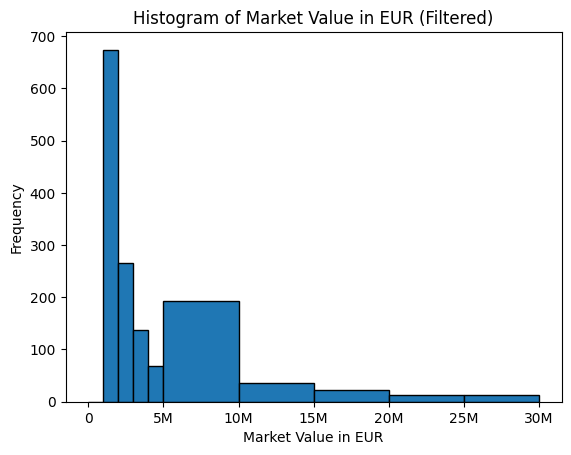

Median market value in EUR: 100000.0


In [ ]:
# Filter out players with market value less than 100,000 EUR
filtered_df = data_df[data_df['market_value_in_eur'] >= 1000000]

# Now, let's recreate the histogram with the filtered data
plt.hist(filtered_df['market_value_in_eur'], bins=bin_ranges, edgecolor='black')

# Format the x-axis labels
formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x/1e6)}M' if x >= 1e6 else f'{int(x/1e3)}K' if x >= 1e3 else str(int(x)))
plt.gca().xaxis.set_major_formatter(formatter)

plt.xlabel('Market Value in EUR')
plt.ylabel('Frequency')
plt.title('Histogram of Market Value in EUR (Filtered)')
plt.show()
# Calculate the median value of the 'market_value_in_eur' column
median_value = data_df['market_value_in_eur'].median()
print("Median market value in EUR:", median_value)



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
# data_df = data_df[data_df['market_value_in_eur'] >= 100000]
print(data_df.shape)
# Create a 'label' column in data_df
data_df_copy['label'] = (data_df_copy['market_value_in_eur'] > 1000000).astype(int)

# Drop the 'market_value_in_eur' column
data_df_copy.drop(columns=['market_value_in_eur'], inplace=True)

# Split the data into features (X) and target (y)
X = data_df_copy.drop('label', axis=1)
y = data_df_copy['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the Perceptron classifier
perceptron = Perceptron(random_state=0)

# Train the Perceptron classifier
perceptron.fit(X_train, y_train)

# Predict on test data
y_pred = perceptron.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC Score:", roc_auc)



(19105, 22)
Accuracy: 0.9424234493588066
Precision: 0.75
Recall: 0.013513513513513514
ROC AUC Score: 0.5066178292769014


In [ ]:
data_df.fillna(0, inplace=True)
data_df_copy = data_df.copy()
data_df

,player_id,yellow_cards,red_cards,goals,assists,minutes_played,yellow_cards_mean,yellow_cards_std,yellow_cards_median,red_cards_mean,...,goals_mean,goals_std,goals_median,assists_mean,assists_std,assists_median,minutes_played_mean,minutes_played_std,minutes_played_median,market_value_in_eur
0,38004,0,0,2,0,90,0.030303,0.172733,0.0,0.000000,...,0.30303,0.525348,0.0,0.106061,0.310275,0.0,83.015152,19.776048,90.0,75000.0
1,79232,0,0,0,0,90,0.100000,0.316228,0.0,0.000000,...,0.10000,0.316228,0.0,0.100000,0.316228,0.0,61.200000,35.670716,82.0,300000.0
2,42792,0,0,0,0,45,0.125000,0.353553,0.0,0.000000,...,0.12500,0.353553,0.0,0.125000,0.353553,0.0,33.000000,30.218254,33.5,150000.0
3,73333,0,0,0,0,90,0.076923,0.271746,0.0,0.000000,...,0.00000,0.000000,0.0,0.038462,0.196116,0.0,58.230769,33.870704,71.5,200000.0
4,122011,0,0,0,1,90,0.090909,0.288355,0.0,0.006061,...,0.20000,0.457991,0.0,0.133333,0.358407,0.0,73.933333,29.933490,90.0,50000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19100,606872,1,0,0,0,31,1.000000,0.000000,1.0,0.000000,...,0.00000,0.000000,0.0,0.000000,0.000000,0.0,31.000000,0.000000,31.0,2000000.0
19101,610427,0,0,0,0,8,0.000000,0.000000,0.0,0.000000,...,0.00000,0.000000,0.0,0.000000,0.000000,0.0,8.000000,0.000000,8.0,100000.0
19102,705991,0,0,0,0,16,0.000000,0.000000,0.0,0.000000,...,0.00000,0.000000,0.0,0.000000,0.000000,0.0,16.000000,0.000000,16.0,200000.0
19103,286841,0,0,0,0,1,0.000000,0.000000,0.0,0.000000,...,0.00000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.000000,1.0,400000.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Assuming data_df_copy is your DataFrame and already loaded

# Modify the label creation
conditions = [
    data_df_copy['market_value_in_eur'] > 2000000,
    data_df_copy['market_value_in_eur'] > 1000000,
    data_df_copy['market_value_in_eur'] > 500000,
    data_df_copy['market_value_in_eur'] > 100000,
]
choices = [4, 3, 2, 1]
data_df_copy['label'] = np.select(conditions, choices, default=0)

# Drop the 'market_value_in_eur' column
data_df_copy.drop(columns=['market_value_in_eur'], inplace=True)

# Split the data into features (X) and target (y)
X = data_df_copy.drop('label', axis=1)
y = data_df_copy['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the Logistic Regression classifier for multiclass
model = LogisticRegression(multi_class='multinomial', random_state=0)

# Train the classifier
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')

# Print the evaluation results
print("Accuracy:", accuracy)
print("Macro-average Precision:", precision_macro)
print("Macro-average Recall:", recall_macro)
print("Micro-average Precision:", precision_micro)
print("Micro-average Recall:", recall_micro)
print("Weighted-average Precision:", precision_weighted)
print("Weighted-average Recall:", recall_weighted)

# # Confusion Matrix
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))


Accuracy: 0.5574456948442816
Macro-average Precision: 0.11148913896885633
Macro-average Recall: 0.2
Micro-average Precision: 0.5574456948442816
Micro-average Recall: 0.5574456948442816
Weighted-average Precision: 0.31074570270042395
Weighted-average Recall: 0.5574456948442816


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SS